# Visualization of the MaxEnt map
Results calculated in R
Visualizing in Python

In [1]:
%matplotlib inline
import sys
sys.path.append('/apps')
import django
django.setup()
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import geopandas as gpd
## Use the ggplot style
plt.style.use('ggplot')

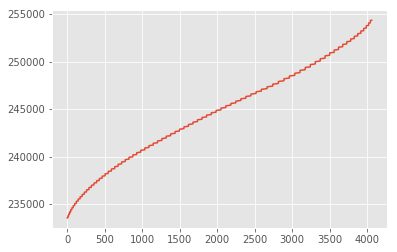

In [2]:
#file = '/outputs/presence_only_models/predictors/dataset100x100-puebla-p9/0-pred.csv'
#PDF = read.csv(file)
## REad adjancency matrix
mat_filename = "/outputs/training_data_sample_puebla_p9_abies_pinophyta_adjmat.npy"


TDF = pd.read_csv("/outputs/training_data_sample_puebla_p9_abies_pinophyta.csv")
## Order it according to the id of the cell
## This is important because the adjancy matrix rows need to be the same

TDF.sort_values(by='cell_ids',inplace=True)

plt.plot(TDF.cell_ids.values)

#gTDF = gpd.GeoDataFrame(TDF,geometry='geometry')


In [11]:
import utilities.data_extraction as de
gTDF = de.toGeoDataFrame(TDF,xcoord_name='Longitude',ycoord_name='Latitude')

## Extract the polygons from cells


## Run this to load geometries directly from saved file
### it's faster,[Required to make this efficient]

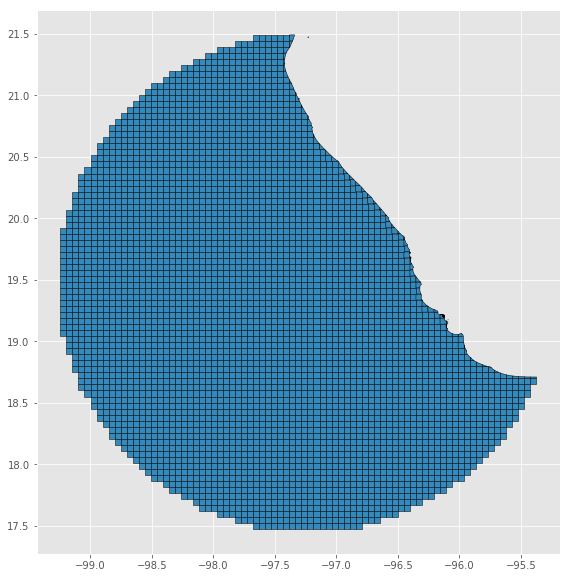

In [4]:
## Geometry file
geometryfile = "/outputs/training_data_sample_puebla_p9_geometry.json"
## Readfile
gg = gpd.read_file(geometryfile)
gg.set_index('indx',inplace=True)
plt.rcParams['figure.figsize'] = [10, 10]
gg.plot(edgecolor='black')

### Develop here new pseudo-absences strategies designs
This has been done in R. 
Let's see how we can use it from here

> IMPOSIBLE TO INSTALL new version of Rpy2 due to stupid python 2/7
Continue evading the problem, as the water....

In [199]:
# Read from csv
file_ = '/outputs/presence_only_models/modelCAR1.csv'

data = pd.read_csv(file_)
data = data.drop(data.columns[0],axis=1)
data.set_index(data.columns[0],inplace=True)
data.set_index(data.index.astype('int'),inplace=True)
#fitted_sample = fitted_sample.transpose()
## ## Join it with geodataframe
gdf = gg.join(data,how='inner')
gdf.crs = {'init' : 'epsg:4326'}

In [208]:
# Read MaxEnt csv
file_ = '/outputs/presence_only_models/maxent_pines.csv'
datam = pd.read_csv(file_)
datam = datam.drop(datam.columns[0],axis=1)
datam.set_index(datam.columns[0],inplace=True)
datam.set_index(datam.index.astype('int'),inplace=True)
#fitted_sample = fitted_sample.transpose()
## ## Join it with geodataframe
maxentdf = gg.join(datam,how='inner')
maxentdf.crs = {'init' : 'epsg:4326'}

### Plot with GeoViews

<img src='data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAEAAAABACAYAAACqaXHeAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAAB+wAAAfsBxc2miwAAABl0RVh0U29mdHdhcmUAd3d3Lmlua3NjYXBlLm9yZ5vuPBoAAA6zSURB
VHic7ZtpeFRVmsf/5966taWqUlUJ2UioBBJiIBAwCZtog9IOgjqACsogKtqirT2ttt069nQ/zDzt
tI4+CrJIREFaFgWhBXpUNhHZQoKBkIUASchWla1S+3ar7r1nPkDaCAnZKoQP/D7mnPOe9/xy76n3
nFSAW9ziFoPFNED2LLK5wcyBDObkb8ZkxuaoSYlI6ZcOKq1eWFdedqNzGHQBk9RMEwFAASkk0Xw3
ETacDNi2vtvc7L0ROdw0AjoSotQVkKSvHQz/wRO1lScGModBFbDMaNRN1A4tUBCS3lk7BWhQkgpD
lG4852/+7DWr1R3uHAZVQDsbh6ZPN7CyxUrCzJMRouusj0ipRwD2uKm0Zn5d2dFwzX1TCGhnmdGo
G62Nna+isiUqhkzuKrkQaJlPEv5mFl2fvGg2t/VnzkEV8F5ioioOEWkLG86fvbpthynjdhXYZziQ
x1hC9J2NFyi8vCTt91Fh04KGip0AaG9zuCk2wQCVyoNU3Hjezee9bq92duzzTmxsRJoy+jEZZZYo
GTKJ6SJngdJqAfRzpze0+jHreUtPc7gpBLQnIYK6BYp/uGhw9YK688eu7v95ysgshcg9qSLMo3JC
4jqLKQFBgdKDPoQ+Pltb8dUyQLpeDjeVgI6EgLIQFT5tEl3rn2losHVsexbZ3EyT9wE1uGdkIPcy
BGxn8QUq1QrA5nqW5i2tLqvrrM9NK6AdkVIvL9E9bZL/oyfMVd/jqvc8LylzRBKDJSzIExwhQzuL
QYGQj4rHfFTc8mUdu3E7yoLtbTe9gI4EqVgVkug2i5+uXGo919ixbRog+3fTbQ8qJe4ZOYNfMoTI
OoshUNosgO60AisX15aeI2PSIp5KiFLI9ubb1vV3Qb2ltwLakUCDAkWX7/nHKRmmGIl9VgYsUhJm
2NXjKYADtM1ygne9QQDIXlk49FBstMKx66D1v4+XuQr7vqTe0VcBHQlRWiOCbmmSYe2SqtL6q5rJ
zsTb7lKx3FKOYC4DoqyS/B5bvLPxvD9Qtf6saxYLQGJErmDOdOMr/zo96km1nElr8bmPOBwI9COv
HnFPRIwmkSOv9kcAS4heRsidOkpeWBgZM+UBrTFAXNYL5Vf2ii9c1trNzpYdaoVil3WIc+wdk+gQ
noie3ecCcxt9ITcLAPWt/laGEO/9U6PmzZkenTtsSMQ8uYywJVW+grCstAvCIaAdArAsIWkRDDs/
KzLm2YcjY1Lv0UdW73HabE9n6V66cxSzfEmuJssTpKGVp+0vHq73FwL46eOjpMpbRAnNmJFrGJNu
Ukf9Yrz+3rghiumCKNXXWPhLYcjxGsIpoCMsIRoFITkW8AuyM8jC1+/QLx4bozCEJIq38+1rtpR6
V/yzb8eBlRb3fo5l783N0CWolAzJHaVNzkrTzlEp2bQ2q3TC5gn6wpnoQAmwSiGh2GitnTmVMc5O
UyfKWUKCIsU7+fZDKwqdT6DDpvkzAX4/+AMFjk0tDp5GRXLpQ2MUmhgDp5gxQT8+Y7hyPsMi8uxF
71H0oebujHALECjFKaW9Lm68n18wXp2kVzIcABytD5iXFzg+WVXkegpAsOOYziqo0OkK76GyquC3
ltZAzMhhqlSNmmWTE5T6e3IN05ITFLM4GdN0vtZ3ob8Jh1NAKXFbm5PtLU/eqTSlGjkNAJjdgn/N
aedXa0tdi7+t9G0FIF49rtMSEgAs1kDLkTPO7ebm4IUWeyh1bKomXqlgMG6kJmHcSM0clYLJ8XtR
1GTnbV3F6I5wCGikAb402npp1h1s7LQUZZSMIfALFOuL3UUrfnS8+rez7v9qcold5tilgHbO1fjK
9ubb17u9oshxzMiUBKXWqJNxd+fqb0tLVs4lILFnK71H0Ind7uiPgACVcFJlrb0tV6DzxqqTIhUM
CwDf1/rrVhTa33/3pGPxJYdQ2l2cbgVcQSosdx8uqnDtbGjh9SlDVSMNWhlnilfqZk42Th2ZpLpf
xrHec5e815zrr0dfBZSwzkZfqsv+1FS1KUknUwPARVvItfKUY+cn57yP7qv07UE3p8B2uhUwLk09
e0SCOrK+hbdYHYLjRIl71wWzv9jpEoeOHhGRrJAzyEyNiJuUqX0g2sBN5kGK6y2Blp5M3lsB9Qh4
y2Ja6x6+i0ucmKgwMATwhSjdUu49tKrQ/pvN5d53ml2CGwCmJipmKjgmyuaXzNeL2a0AkQ01Th5j
2DktO3Jyk8f9vcOBQHV94OK+fPumJmvQHxJoWkaKWq9Vs+yUsbq0zGT1I4RgeH2b5wef7+c7bl8F
eKgoHVVZa8ZPEORzR6sT1BzDUAD/d9F78e2Tzv99v8D+fLVTqAKAsbGamKey1Mt9Ann4eH3gTXTz
idWtAJ8PQWOk7NzSeQn/OTHDuEikVF1R4z8BQCy+6D1aWRfY0tTGG2OM8rRoPaeIj5ZHzJxszElN
VM8K8JS5WOfv8mzRnQAKoEhmt8gyPM4lU9SmBK1MCQBnW4KONT86v1hZ1PbwSXPw4JWussVjtH9Y
NCoiL9UoH/6PSu8jFrfY2t36erQHXLIEakMi1SydmzB31h3GGXFDFNPaK8Rme9B79Ixrd0WN+1ij
NRQ/doRmuFLBkHSTOm5GruG+pFjFdAmorG4IXH1Qua6ASniclfFtDYt+oUjKipPrCQB7QBQ2lrgP
fFzm+9XWUtcqJ3/5vDLDpJ79XHZk3u8nGZ42qlj1+ydtbxysCezrydp6ugmipNJ7WBPB5tydY0jP
HaVNzs3QzeE4ZpTbI+ZbnSFPbVOw9vsfnVvqWnirPyCNGD08IlqtYkh2hjZ5dErEQzoNm+6ykyOt
Lt5/PQEuSRRKo22VkydK+vvS1XEKlhCJAnsqvcVvH7f/ZU2R67eXbMEGAMiIV5oWZWiWvz5Fv2xG
sjqNJQRvn3Rs2lji/lNP19VjAQDgD7FHhujZB9OGqYxRkZxixgRDVlqS6uEOFaJUVu0rPFzctrnF
JqijImVp8dEKVWyUXDk92zAuMZ6bFwpBU1HrOw6AdhQgUooChb0+ItMbWJitSo5Ws3IAOGEOtL53
0vHZih9sC4vtofZ7Qu6523V/fmGcds1TY3V36pUsBwAbSlxnVh2xLfAD/IAIMDf7XYIkNmXfpp2l
18rkAJAy9HKFaIr/qULkeQQKy9zf1JgDB2uaeFNGijo5QsUyacNUUTOnGO42xSnv4oOwpDi1zYkc
efUc3I5Gk6PhyTuVKaOGyLUAYPGIoY9Pu/atL/L92+4q9wbflRJ2Trpm/jPjdBtfnqB/dIThcl8A
KG7hbRuKnb8qsQsVvVlTrwQAQMUlf3kwJI24Z4JhPMtcfng5GcH49GsrxJpGvvHIaeem2ma+KSjQ
lIwUdYyCY8j4dE1KzijNnIP2llF2wcXNnsoapw9XxsgYAl6k+KzUXbi2yP3KR2ecf6z3BFsBICdW
nvnIaG3eHybqX7vbpEqUMT+9OL4Qpe8VON7dXuFd39v19FoAABRVePbGGuXTszO0P7tu6lghUonE
llRdrhArLvmKdh9u29jcFiRRkfLUxBiFNiqSU9icoZQHo5mYBI1MBgBH6wMNb+U7Pnw337H4gi1Y
ciWs+uks3Z9fztUvfzxTm9Ne8XXkvQLHNytOOZeiD4e0PgkAIAYCYknKUNUDSXEKzdWNpnil7r4p
xqkjTarZMtk/K8TQ6Qve78qqvXurGwIJqcOUKfUWHsm8KGvxSP68YudXq4pcj39X49uOK2X142O0
Tz5/u/7TVybqH0rSya6ZBwD21/gubbrgWdDgEOx9W
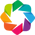

In [209]:
import geoviews as gv
import geoviews.feature as gf
from cartopy import crs
gv.extension('bokeh','matplotlib')

### Plot the Latent variable P (presence)

In [210]:
tiles = gv.tile_sources.EsriImagery
labels = gv.tile_sources.EsriReference 

sample_pt = gTDF[gTDF.Plantae > 0]
pines_pt = gTDF[gTDF.Pinophyta > 0]


width = 500
height = 550

group_name = 'n'
lq9 = 'Maximum Entropy model'
lm = 'Mean Latent Probability of Presence (CAR model)'

cmap = plt.cm.gnuplot2
clim = (0,1)

sample_pt = gv.Points((sample_pt.Longitude,sample_pt.Latitude),group=group_name,label='Sample').opts(
            fill_color = 'white',
            line_color = 'black',
            marker = '^',
            line_width = 0.4,
            line_alpha = 0.9,
            fill_alpha = 0.6,
            size = 2,
            )

presence_pt = gv.Points((pines_pt.Longitude,pines_pt.Latitude),group=group_name,label='Presence').opts(
           marker = 'x',
          color = 'black')

obs = (sample_pt * presence_pt)



gm = gv.Polygons(gdf,vdims=['P_mean'],label=lm).opts(
    tools=['hover'],
    width = width,
    height = height,
    colorbar = True,
    colorbar_position = 'bottom',
    alpha = 1.0,
    line_width = 0.001,
    line_alpha = 0.2,
    clim = clim,
    cmap = cmap
)

maxent = gv.Polygons(maxentdf,vdims=['maxentPines'],label=lq9).opts(
    tools=['hover'],
    width = width,
    height = height,
    colorbar = True,
    colorbar_position = 'bottom',
    alpha = 1.0,
    line_width = 0.001,
    line_alpha = 0.2,
    clim = clim,
    cmap = cmap
)

latent_p_fig = ((gm * obs).relabel(lm) + (maxent * obs).relabel(lq9)).opts(merge_tools=False)

In [211]:
latent_p_fig

:Layout
   .Overlay.Mean_Latent_Probability_of_Presence_left_parenthesis_CAR_model_right_parenthesis :Overlay
      .Polygons.Mean_Latent_Probability_of_Presence_left_parenthesis_CAR_model_right_parenthesis :Polygons   [Longitude,Latitude]   (P_mean)
      .N.Sample                                                                                  :Points   [x,y]
      .N.Presence                                                                                :Points   [x,y]
   .Overlay.Maximum_Entropy_model                                                            :Overlay
      .Polygons.Maximum_Entropy_model :Polygons   [Longitude,Latitude]   (maxentPines)
      .N.Sample                       :Points   [x,y]
      .N.Presence                     :Points   [x,y]

## Model evaluation, K-fold stuff

### Plot the latent Sample S

In [18]:
tiles = gv.tile_sources.EsriImagery
labels = gv.tile_sources.EsriReference 

sample_pt = gTDF[gTDF.Plantae > 0]
pines_pt = gTDF[gTDF.Pinophyta > 0]


width = 500
height = 550

group_name = 'Model 1 - Probability of Latent S'
lq2 = 'Quantile: 0.025'
lq9 = 'Quantile: 0.975'
lm = 'Mean:'
sample_pt = gv.Points((sample_pt.Longitude,sample_pt.Latitude),group=group_name,label='Sample').opts(
            fill_color = 'white',
            line_color = 'black',
            marker = '^',
            line_width = 0.4,
            line_alpha = 0.9,
            fill_alpha = 0.6,
            size = 2,
            )

presence_pt = gv.Points((pines_pt.Longitude,pines_pt.Latitude),group=group_name,label='Presence').opts(
           marker = 'x',
          color = 'black')

obs = (sample_pt * presence_pt)



gq2 = gv.Polygons(gdf,vdims=['S_q025'],group=group_name,label=lq2).opts(
    tools=['hover'],
    width = width,
    height = height,
    colorbar = True,
    colorbar_position = 'bottom',
    clim = clim,    
    alpha = 1.0,
    line_width = 0.001,
    line_alpha = 0.2,
    cmap = cmap
)


gm = gv.Polygons(gdf,vdims=['S_mean'],group=group_name,label=lm).opts(
    tools=['hover'],
    width = width,
    height = height,
    colorbar = True,
    colorbar_position = 'bottom',
    clim = clim,
    alpha = 1.0,
    line_width = 0.001,
    line_alpha = 0.2,   
    cmap = cmap
)

gq9 = gv.Polygons(gdf,vdims=['S_q0975'],group=group_name,label=lq9).opts(
    tools=['hover'],
    width = width,
    height = height,
    colorbar = True,
    colorbar_position = 'bottom',
    clim = clim,
    alpha = 1.0,
    line_width = 0.001,
    line_alpha = 0.2,   
    cmap = cmap
)

latent_s_fig = ((gq2* obs).relabel(lq2) + (gm * obs).relabel(lm) + (gq9 * obs).relabel(lq9)).opts(merge_tools=False)

In [19]:
latent_s_fig

:Layout
   .Model_1_hyphen_minus_Probability_of_Latent_S.Quantile_colon_0_full_stop_025 :Overlay
      .Model_1_hyphen_minus_Probability_of_Latent_S.Quantile_colon_0_full_stop_025 :Polygons   [Longitude,Latitude]   (S_q025)
      .Model_1_hyphen_minus_Probability_of_Latent_S.Sample                         :Points   [x,y]
      .Model_1_hyphen_minus_Probability_of_Latent_S.Presence                       :Points   [x,y]
   .Model_1_hyphen_minus_Probability_of_Latent_S.Mean_colon                     :Overlay
      .Model_1_hyphen_minus_Probability_of_Latent_S.Mean_colon :Polygons   [Longitude,Latitude]   (S_mean)
      .Model_1_hyphen_minus_Probability_of_Latent_S.Sample     :Points   [x,y]
      .Model_1_hyphen_minus_Probability_of_Latent_S.Presence   :Points   [x,y]
   .Model_1_hyphen_minus_Probability_of_Latent_S.Quantile_colon_0_full_stop_975 :Overlay
      .Model_1_hyphen_minus_Probability_of_Latent_S.Quantile_colon_0_full_stop_975 :Polygons   [Longitude,Latitude]   (S_q0975)
      .Model_1_hyphen_minus_Probability_of_Latent_S.Sample                         :Points   [x,y]
      .Model_1_hyphen_minus_Probability_of_Latent_S.Presence                       :Points   [x,y]